### Creating Fig 2

In [2]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
import statistics
import numpy
import seaborn as sns
import numpy as np
import os
os.chdir('../')

# Reset default params
sns.set()

import matplotlib.pyplot as plt


In [11]:

df=pd.read_csv('input/Batch_renewable_energy_both.csv')
df1=df.groupby("HITId").agg({"HITId":"first","Answer.Desirable":"first", "Answer.feasible":"first", "Answer.overall":"first","Answer.viability":"first","Input.variable_name":"first"})
list_desirability_expert=[]
list_feasibility_expert=[]
list_viability_expert=[]
list_overall_expert=[]
for index, row in df1.iterrows():

        list_desirability_expert.append(row["Answer.Desirable"])
        list_feasibility_expert.append(row["Answer.feasible"])
        list_viability_expert.append(row["Answer.viability"])
        list_overall_expert.append(row["Answer.overall"])

df2=df.groupby("HITId").agg({"HITId":"last","Answer.Desirable":"last", "Answer.feasible":"last", "Answer.overall":"last","Answer.viability":"last","Input.variable_name":"last"})
list_desirability_3=[]
list_feasibility_3=[]
list_viability_3=[]
list_overall_3=[]

for index, row in df2.iterrows():


        list_desirability_3.append(row["Answer.Desirable"])
        list_feasibility_3.append(row["Answer.feasible"])
        list_viability_3.append(row["Answer.viability"])
        list_overall_3.append(row["Answer.overall"])

print(cohen_kappa_score(list_desirability_expert, list_desirability_3))
print(cohen_kappa_score(list_feasibility_expert, list_feasibility_3))
print(cohen_kappa_score(list_viability_expert, list_viability_3))
print(cohen_kappa_score(list_overall_expert, list_overall_3))

0.15030346304891107
0.3147617341454676
0.1802107519199858
0.3140243902439024


1.2018504251546631
1.1338934190276817
1.1338934190276817
1.3110110602126894
1.2909944487358056


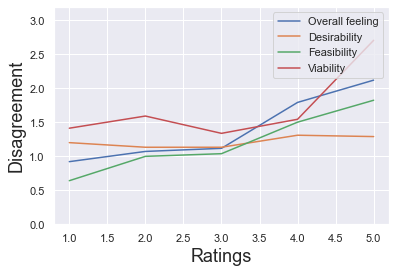

In [12]:
from math import sqrt

X_desirability=[]
y_desirability=[]
X_feasibility=[]
y_feasibility=[]
X_viability=[]
y_viability=[]
X_overall=[]
y_overall=[]
y_lenght=[]
    
for rate in [1,2,3,4,5]:
    index=[i for i, e in enumerate(list_desirability_expert) if e == rate]

    exp_1=[]
    crowd_1=[]
    len_1=[]
    for ii in index:
        exp_1.append(list_desirability_expert[ii])
        crowd_1.append(list_desirability_3[ii])

    print(sqrt(mean_squared_error(exp_1,crowd_1)))
    X_desirability.append(rate)
    y_desirability.append(sqrt(mean_squared_error(exp_1,crowd_1)))
    
    index=[i for i, e in enumerate(list_feasibility_expert) if e == rate]

    exp_1=[]
    crowd_1=[]
    for ii in index:
        exp_1.append(list_feasibility_expert[ii])
        crowd_1.append(list_feasibility_3[ii])

    X_feasibility.append(rate)
    y_feasibility.append(sqrt(mean_squared_error(exp_1,crowd_1)))
    try:
    
        index=[i for i, e in enumerate(list_viability_expert) if e == rate]

        exp_1=[]
        crowd_1=[]
        for ii in index:
            exp_1.append(list_viability_expert[ii])
            crowd_1.append(list_viability_3[ii])

        y_viability.append(sqrt(mean_squared_error(exp_1,crowd_1)))
        X_viability.append(rate)
        
    except:
        pass
    try:
    
        index=[i for i, e in enumerate(list_overall_expert) if e == rate]

        exp_1=[]
        crowd_1=[]
        for ii in index:
            exp_1.append(list_overall_expert[ii])
            crowd_1.append(list_overall_3[ii])

        
        y_overall.append(sqrt(mean_squared_error(exp_1,crowd_1)))
        X_overall.append(rate)
        
    except:
        pass



###########################################

plt.plot(X_overall, y_overall, label='Overall feeling' )
plt.plot(X_desirability, y_desirability, label='Desirability')
plt.plot(X_feasibility, y_feasibility, label='Feasibility')
plt.plot(X_viability, y_viability, label='Viability')

plt.ylim(0,3.2)
plt.legend(loc='upper right')
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Disagreement', fontsize=18)
plt.show()